In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\Odin school\ML_capstone_project\laptop\laptop.csv")

In [4]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
df.drop('Unnamed: 0.1',axis = 1, inplace = True )
df.drop('Unnamed: 0',axis = 1, inplace = True )

In [7]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [9]:
empty_rows=df[df.isnull().all(axis=1)]

In [10]:
print(empty_rows)

     Company TypeName Inches ScreenResolution  Cpu  Ram Memory  Gpu OpSys  \
20       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
46       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
50       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
115      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
125      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
148      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
190      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
209      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
267      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
336      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
350      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
478      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   

In [11]:
#removing the empty rows
df = df.dropna(how='all')

In [13]:
#removing the null rows
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [14]:
df['Weight'] = df['Weight'].replace('?', np.nan)

In [15]:
(df['Weight'] == '?').sum()

0

In [16]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: Weight, Length: 1273, dtype: object

In [17]:
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)
df['Weight'] = df['Weight'].astype(float)
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1273, dtype: float64

<Axes: >

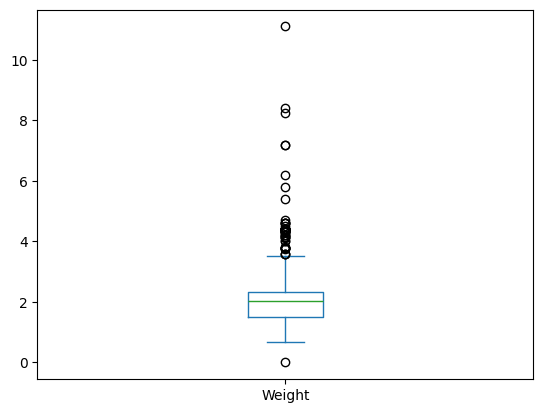

In [18]:
#Checking outliers
df["Weight"].plot(kind="box")

In [19]:
# filling the value using median as there are outliers
df["Weight"].fillna(df["Weight"].median(),inplace=True)

In [20]:
df['Inches'] = df['Inches'].replace('?', np.nan)
df['Inches'] = df['Inches'].astype(float)
df['Inches']

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: Inches, Length: 1273, dtype: float64

<Axes: >

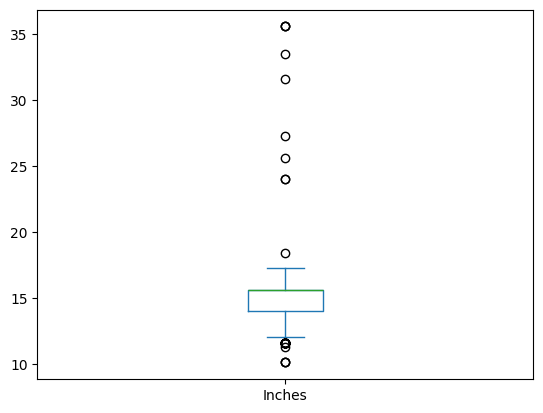

In [21]:
#Checking outliers
df["Inches"].plot(kind="box")

In [22]:
# filling the value using median as there are outliers
df["Inches"].fillna(df["Inches"].median(),inplace=True)

In [23]:
df['Memory'] = df['Memory'].replace('?', np.nan)
df["Memory"].fillna(df["Memory"].mode()[0],inplace=True)

In [24]:
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False).astype(float)

In [25]:
#removing Outiers from Inches
q1 = df.describe()["Inches"]["25%"]
q3 = df.describe()["Inches"]["75%"]
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
df["Inches"]= df["Inches"].clip(lower_limit, upper_limit)

In [26]:
#removing Outiers from weight
q1 = df.describe()["Weight"]["25%"]
q3 = df.describe()["Weight"]["75%"]
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
df["Weight"]= df["Weight"].clip(lower_limit, upper_limit)

## Feature engineering and Data Exploration

In [27]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [28]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1273, dtype: object

In [29]:
# created a new column to find whether there is touchscreen feature or not
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [30]:
df['Touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1273, dtype: int64

In [31]:
# created a new column to find whether there is touchscreen feature or not
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [32]:
# create a new column for resolution 
df['Resolution'] = df['ScreenResolution'].str.split().str[-1]
df['Resolution'] = df['Resolution'].str.replace('x', ' ',regex=False)
df['X_res'] = df['Resolution'].apply(lambda x: x.split()[0])
df['Y_res'] = df['Resolution'].apply(lambda x: x.split()[-1])
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [33]:
df['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1273, dtype: int32

In [34]:
df['Y_res']

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_res, Length: 1273, dtype: int32

In [35]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [36]:
df.drop(columns = ['ScreenResolution', 'X_res','Resolution', 'Y_res','Inches'],inplace=True)

In [37]:
df['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1273, dtype: object

In [38]:
df["Processor_brand"] = df['Cpu'].str.split().str[:3].apply(lambda x: ' '.join(x))

In [39]:
df["Processor_brand"]

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Processor_brand, Length: 1273, dtype: object

In [40]:
df["Memory"] 

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1273, dtype: object

In [41]:
# create a new column for SSD
target_word = 'SSD'

# Function to extract the word before the target word
def word_before_target(text, target):
    words = text.split()
    if target in words:
        index = words.index(target)
        if index > 0:  # Ensure there's a word before the target
            return words[index - 1]
    return 

# Create the new column
df['SSD'] = df['Memory'].apply(lambda x: word_before_target(x, target_word))
df['SSD'] = df['SSD'].str.replace('1TB', '1024GB', regex=False)
df['SSD'] = df['SSD'].str.replace('GB', '', regex=False)
df['SSD'] = df['SSD'].fillna(0)

In [42]:
df['SSD'].value_counts()

SSD
256     488
0       450
128     168
512     136
1024     15
32        6
180       4
16        3
64        1
240       1
8         1
Name: count, dtype: int64

In [43]:
# create a new column for HDD
target_word = 'HDD'

# Function to extract the word before the target word
def word_before_target(text, target):
    words = text.split()
    if target in words:
        index = words.index(target)
        if index > 0:  # Ensure there's a word before the target
            return words[index - 1]
    return 

# Create the new column
df['HDD'] = df['Memory'].apply(lambda x: word_before_target(x, target_word))
df['HDD'] = df['HDD'].str.replace('1.0TB', '1024GB', regex=False)
df['HDD'] = df['HDD'].str.replace('1TB', '1024GB', regex=False)
df['HDD'] = df['HDD'].str.replace('2TB', '2048GB', regex=False)
df['HDD'] = df['HDD'].str.replace('GB', '', regex=False)
df['HDD'] = df['HDD'].fillna(0)

In [44]:
df['HDD'].value_counts()

HDD
0       709
1024    399
500     132
2048     31
32        1
128       1
Name: count, dtype: int64

In [45]:
# create a new column for Flash Storage
target_word = 'Flash'

# Function to extract the word before the target word
def word_before_target(text, target):
    words = text.split()
    if target in words:
        index = words.index(target)
        if index > 0:  # Ensure there's a word before the target
            return words[index - 1]
    return 

# Create the new column
df['Flash_Storage'] = df['Memory'].apply(lambda x: word_before_target(x, target_word))
df['Flash_Storage'] = df['Flash_Storage'].str.replace('GB', '', regex=False)
df['Flash_Storage'] = df['Flash_Storage'].fillna(0)

In [46]:
# create a new column for Hybrid
target_word = 'Hybrid'

# Function to extract the word before the target word
def word_before_target(text, target):
    words = text.split()
    if target in words:
        index = words.index(target)
        if index > 0:  # Ensure there's a word before the target
            return words[index - 1]
    return 

# Create the new column
df['Hybrid'] = df['Memory'].apply(lambda x: word_before_target(x, target_word))
df['Hybrid'] = df['Hybrid'].str.replace('1.0TB', '1024GB', regex=False)
df['Hybrid'] = df['Hybrid'].str.replace('GB', '', regex=False)
df['Hybrid'] = df['Hybrid'].fillna(0)

In [47]:
df['Hybrid'].value_counts()

Hybrid
0       1261
1024      11
508        1
Name: count, dtype: int64

In [48]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [49]:
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [50]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor_brand,SSD,HDD,Flash_Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0,Intel


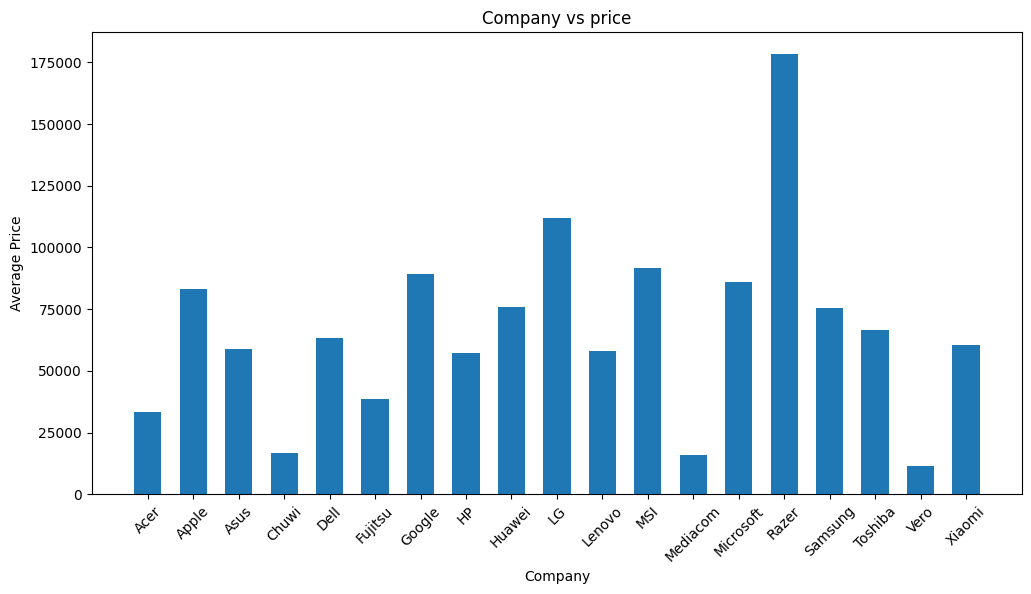

In [51]:
average_values = df.groupby('Company')['Price'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(average_values['Company'], average_values['Price'],width=0.6)
plt.title('Company vs price')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

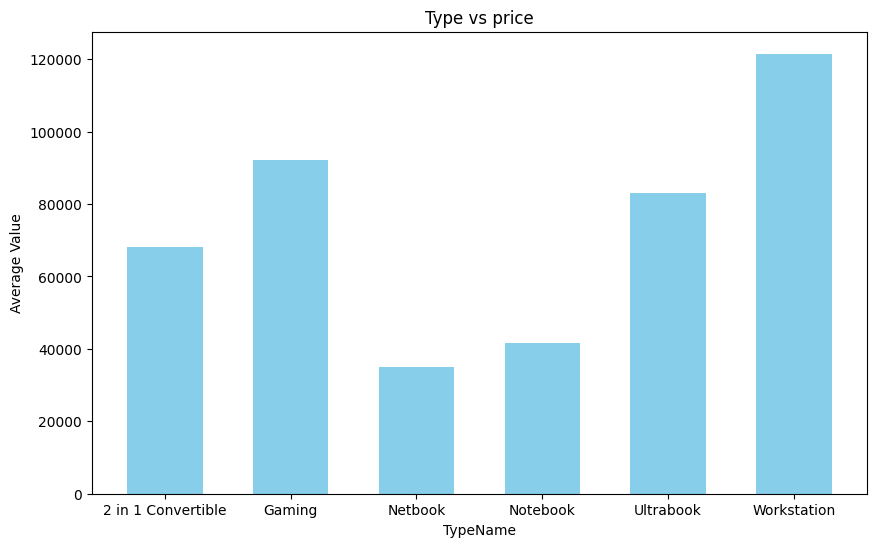

In [52]:
average_values = df.groupby('TypeName')['Price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(average_values['TypeName'], average_values['Price'], color='skyblue',width=0.6)
plt.title('Type vs price')
plt.xlabel('TypeName')
plt.ylabel('Average Value')
plt.show()

Text(0, 0.5, 'Price')

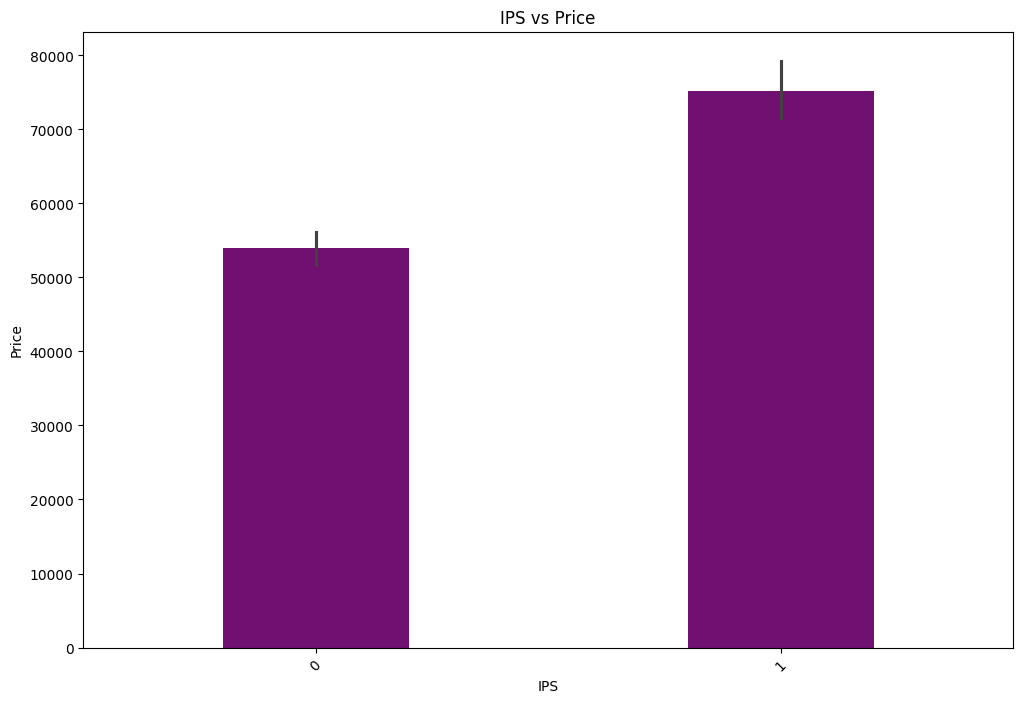

In [53]:
plt.figure(figsize=(12, 8))

# df_sorted = df.sort_values(by='Price', ascending=False).head(6)
sns.barplot(x=df["IPS"], y=df['Price'], width=0.4, color="purple")

# Add titles and labels
plt.title('IPS vs Price')
plt.xticks(rotation=45)
plt.xlabel('IPS')
plt.ylabel('Price')

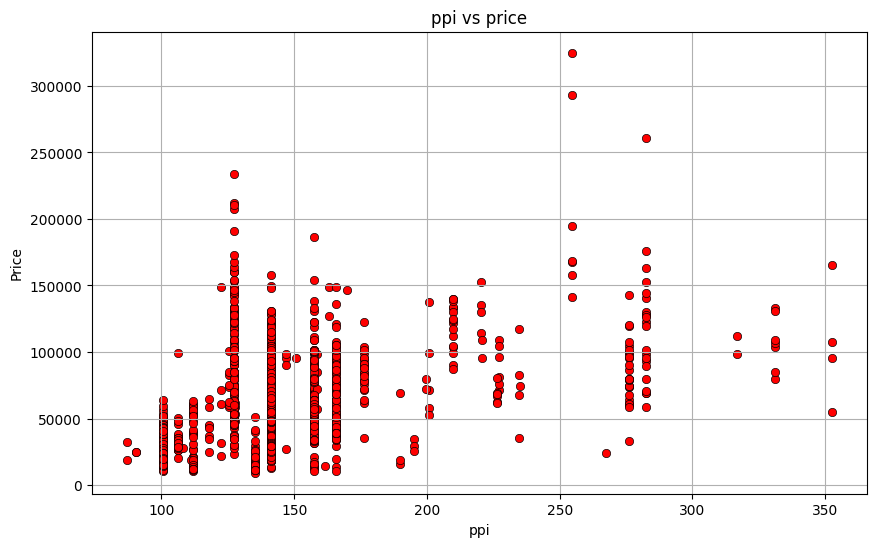

In [54]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ppi', y='Price', data=df, color='red', edgecolor='black')

# Add titles and labels
plt.xlabel('ppi')
plt.ylabel('Price')

# Show the plot
plt.title('ppi vs price')
plt.grid(True)
plt.show()

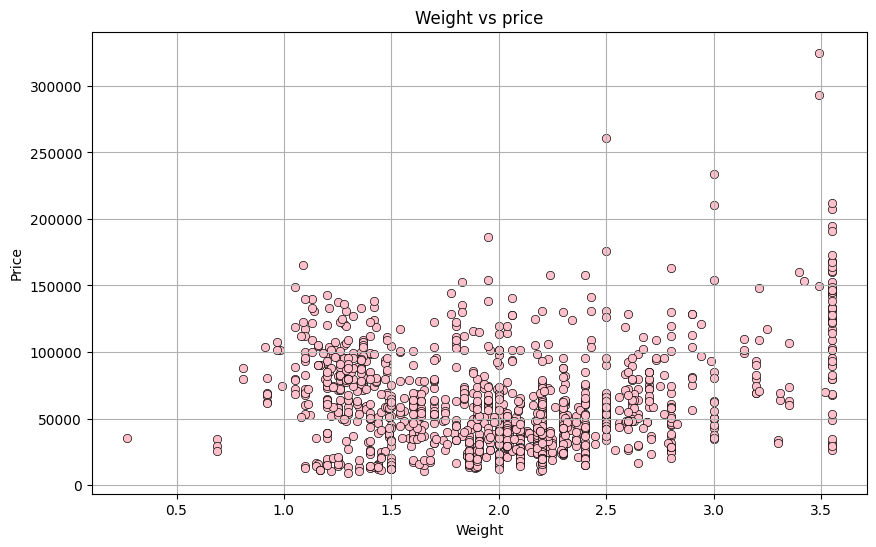

In [55]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Price', data=df, color='pink', edgecolor='black')

# Add titles and labels
plt.xlabel('Weight')
plt.ylabel('Price')

# Show the plot
plt.title('Weight vs price')
plt.grid(True)
plt.show()

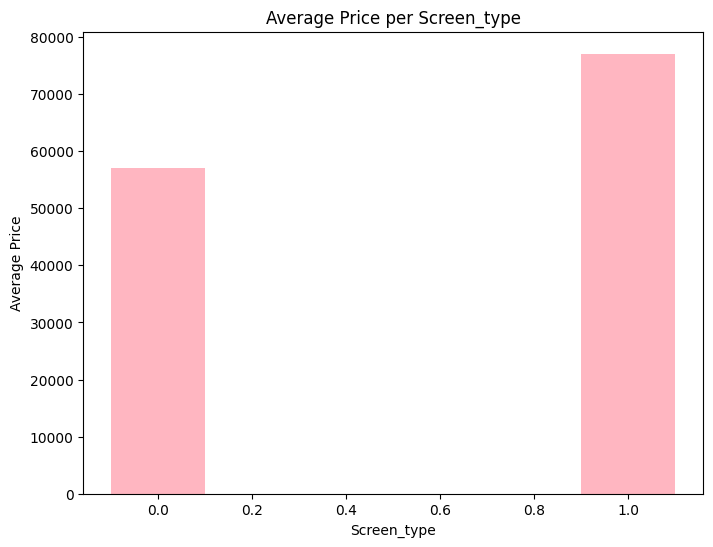

In [56]:
average_values = df.groupby('Touchscreen')['Price'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(average_values['Touchscreen'], average_values['Price'], color='lightpink',width=0.2)
plt.title('Average Price per Screen_type')
plt.xlabel('Screen_type')
plt.ylabel('Average Price')
plt.show()

In [57]:
df['Processor_brand'].value_counts()

Processor_brand
Intel Core i7               515
Intel Core i5               410
Intel Core i3               134
Intel Celeron Dual           79
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
AMD A8-Series 7410            4
Intel Atom x5-Z8350           4
AMD Ryzen 1700                3
Intel Atom x5-Z8550           3
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
Intel Atom X5-Z8350           2
AMD A6-Series A6-9220         2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD E-Series 7110             2
AMD E-Series E2-9000e         2
AMD A10-Series 9600P          2
AMD Ryzen 1600                1
AMD E-Series E2-6110          1
Intel Atom x5-Z8300           1
AMD E-Series 9000e            1
AMD A6-Series 7310      

In [58]:
def get_data(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Intel processors"
        else:
            return "AMD Processor"

In [59]:
df['Processor_brand'] = df['Processor_brand'].apply(get_data)

In [60]:
df.drop(columns = ['Cpu'],inplace=True)

Text(0, 0.5, 'Price')

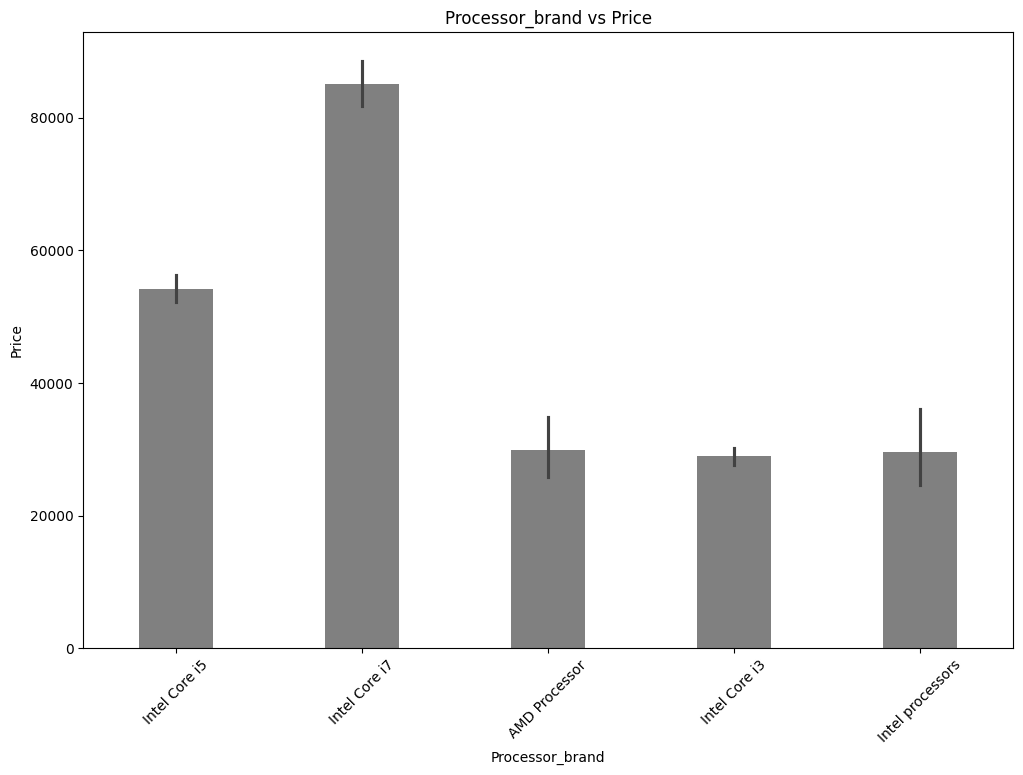

In [61]:
plt.figure(figsize=(12, 8))

# df_sorted = df.sort_values(by='Price', ascending=False).head(6)
sns.barplot(x=df["Processor_brand"], y=df['Price'], width=0.4, color="grey")

# Add titles and labels
plt.title('Processor_brand vs Price')
plt.xticks(rotation=45)
plt.xlabel('Processor_brand')
plt.ylabel('Price')

In [62]:
df = df.astype({
    'SSD': 'float',
    'HDD': 'float',
    'Flash_Storage': 'float',
    'Hybrid' : 'float'          
})

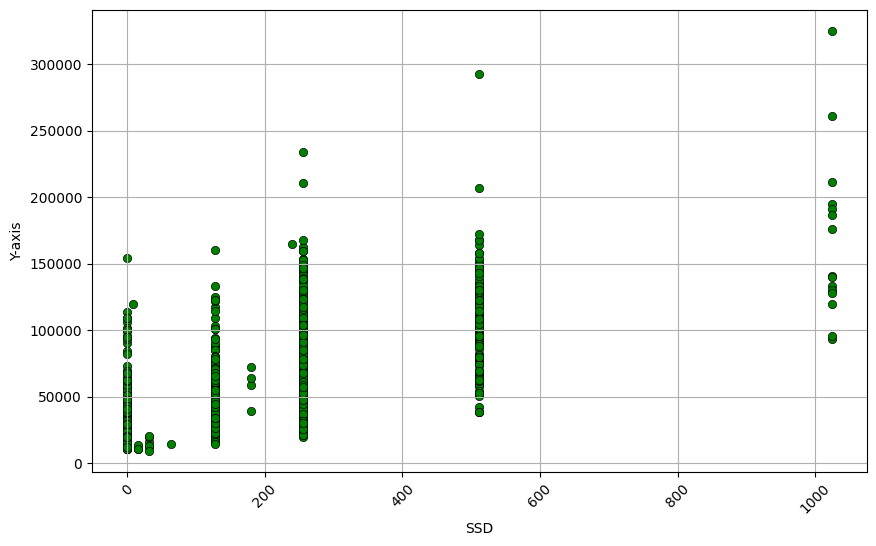

In [63]:
 # Create a scatter plot for SSD
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSD', y='Price', data=df, color='green', edgecolor='black')

# Add titles and labels
plt.xlabel('SSD')
plt.ylabel('Y-axis')
plt.xticks(rotation=45)
# Show the plot
plt.grid(True)
plt.show()

Text(0, 0.5, 'Price')

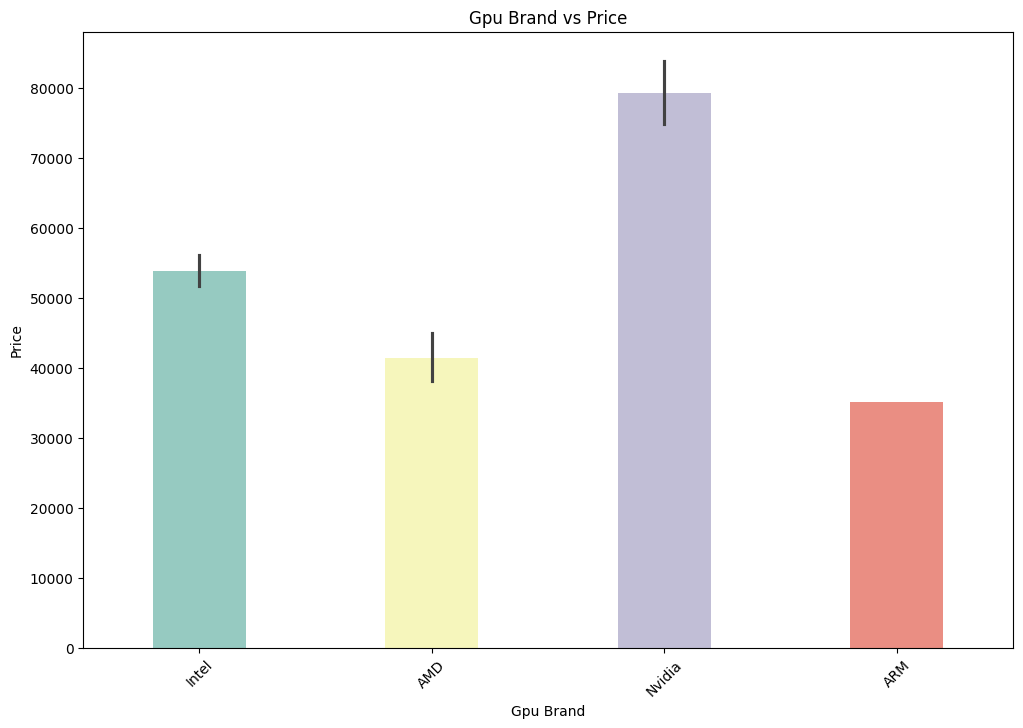

In [64]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Gpu Brand', y='Price',data=df, width=0.4, palette='Set3')

# Add titles and labels
plt.title('Gpu Brand vs Price')
plt.xticks(rotation=45)
plt.xlabel('Gpu Brand')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

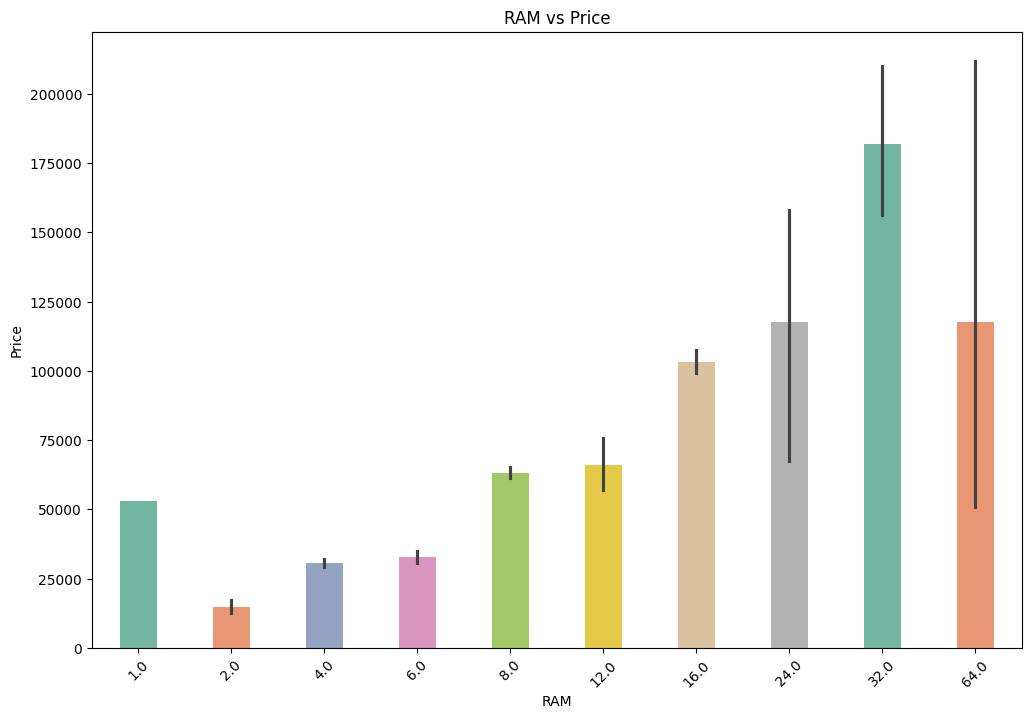

In [65]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Ram', y='Price',data=df, width=0.4, palette='Set2')

# Add titles and labels
plt.title('RAM vs Price')
plt.xticks(rotation=45)
plt.xlabel('RAM')
plt.ylabel('Price')

In [66]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [67]:
def os(val):
    if val == "Windows 10" or val == "Windows 7" or val == "Windows 10 S":
        return "Windows"
    elif val == "macOS" or val == "Mac OS X":
        return "Mac"
    else:
        return "Others/No OS/Linux"
    

Text(0, 0.5, 'Price')

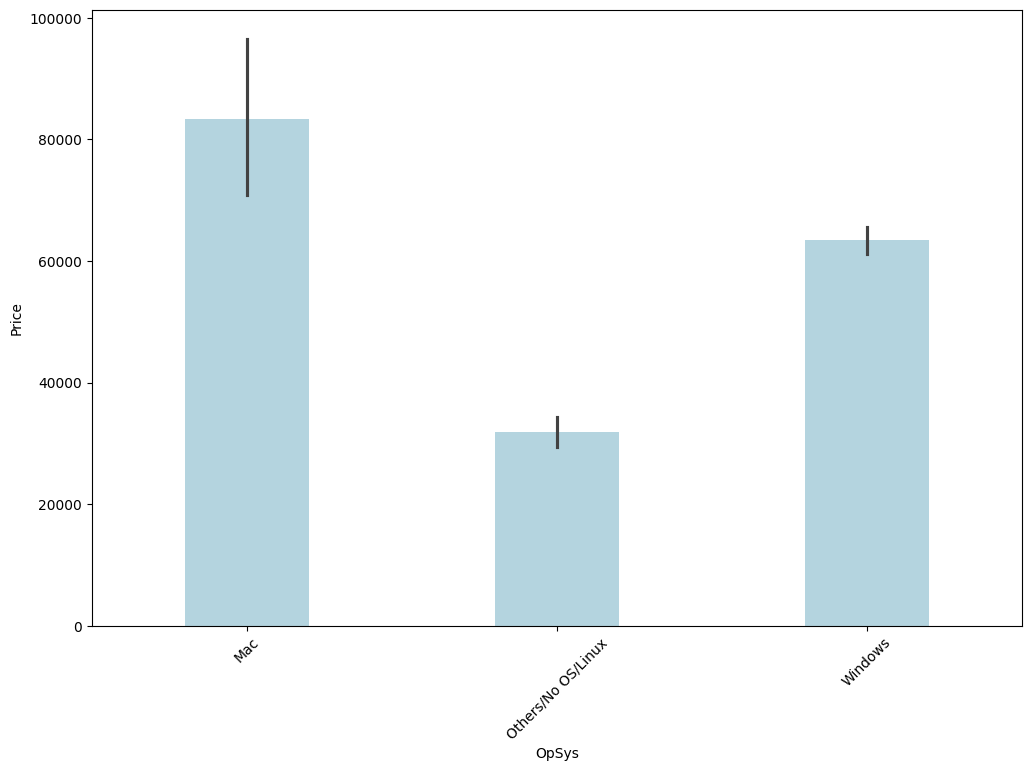

In [68]:
plt.figure(figsize=(12, 8))


sns.barplot(x=df["OpSys"].apply(os), y=df['Price'], width=0.4, color="lightblue")

# Add titles and labels
plt.xticks(rotation=45)
plt.xlabel('OpSys')
plt.ylabel('Price')

In [69]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()["Price"]

Ram              0.685648
Weight           0.150730
Price            1.000000
Touchscreen      0.188994
IPS              0.254851
ppi              0.476672
SSD              0.674106
HDD             -0.093009
Flash_Storage   -0.038332
Hybrid           0.007864
Name: Price, dtype: float64

<Axes: >

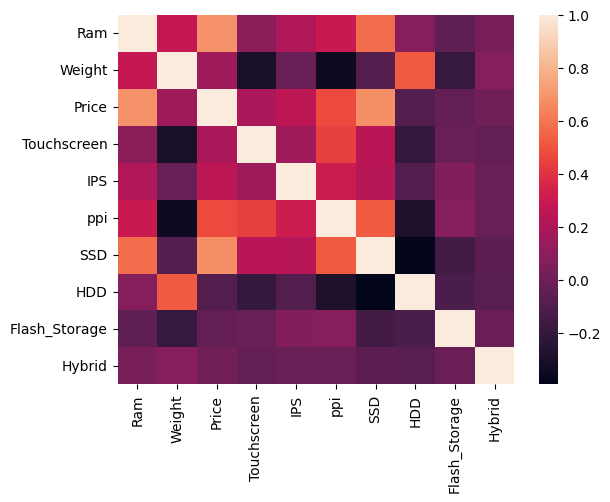

In [70]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr())

In [71]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor_brand,SSD,HDD,Flash_Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128.0,0.0,0.0,0.0,Intel
1,Apple,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,128.0,0.0,Intel
2,HP,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256.0,0.0,0.0,0.0,Intel
3,Apple,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512.0,0.0,0.0,0.0,AMD
4,Apple,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256.0,0.0,0.0,0.0,Intel


In [72]:
df = df.drop('Gpu', axis=1)

In [73]:
df = df.drop('Memory', axis=1)

In [74]:
df = df.drop('Hybrid', axis=1)

In [75]:
 df = pd.get_dummies(df, columns = ["Company", "TypeName", "Processor_brand", "Gpu Brand", "OpSys"],drop_first = True, dtype = np.int64)

In [76]:
df.head()

,Ram,Weight,Price,Touchscreen,IPS,ppi,SSD,HDD,Flash_Storage,Company_Apple,...,Gpu Brand_Intel,Gpu Brand_Nvidia,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,8.0,1.37,71378.6832,0,1,226.983005,128.0,0.0,0.0,1,...,1,0,0,0,0,0,0,0,0,1
1,8.0,1.34,47895.5232,0,0,127.677940,0.0,0.0,128.0,1,...,1,0,0,0,0,0,0,0,0,1
2,8.0,1.86,30636.0000,0,0,141.211998,256.0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
3,16.0,1.83,135195.3360,0,1,220.534624,512.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
4,8.0,1.37,96095.8080,0,1,226.983005,256.0,0.0,0.0,1,...,1,0,0,0,0,0,0,0,0,1


<Axes: xlabel='Price', ylabel='Density'>

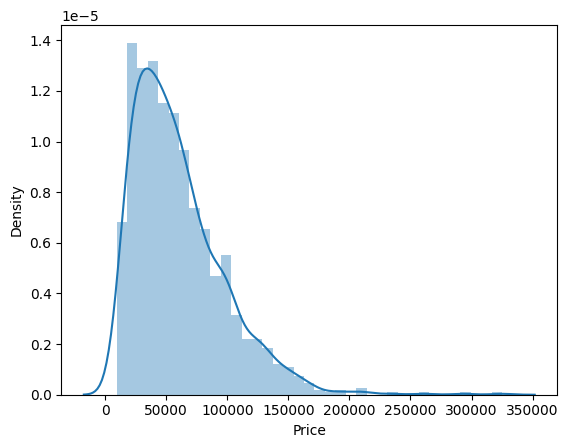

In [77]:
sns.distplot(df["Price"])

<Axes: xlabel='Price', ylabel='Density'>

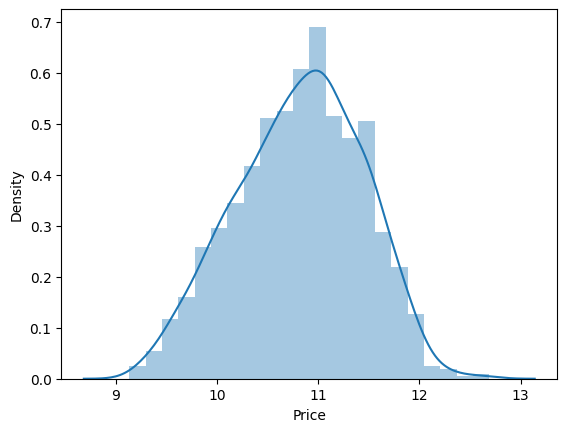

In [101]:
sns.distplot(np.log(df["Price"]))

## Model development

In [78]:
X = df.drop(columns=["Price"])
y = np.log(df['Price'])

In [79]:
X

,Ram,Weight,Touchscreen,IPS,ppi,SSD,HDD,Flash_Storage,Company_Apple,Company_Asus,...,Gpu Brand_Intel,Gpu Brand_Nvidia,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,8.0,1.37,0,1,226.983005,128.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,8.0,1.34,0,0,127.677940,0.0,0.0,128.0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,8.0,1.86,0,0,141.211998,256.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,16.0,1.83,0,1,220.534624,512.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,8.0,1.37,0,1,226.983005,256.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4.0,1.80,1,1,157.350512,128.0,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0
1299,16.0,1.30,1,1,276.053530,512.0,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0
1300,2.0,1.50,0,0,111.935204,0.0,0.0,64.0,0,0,...,1,0,0,0,0,0,1,0,0,0
1301,6.0,2.19,0,0,100.454670,0.0,1024.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1273, dtype: float64

In [81]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15, random_state = 0)

In [82]:
#training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [83]:
#testing 
y_pred = lr.predict(X_test)

In [84]:
#error
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mse

0.0673667463326896

In [87]:
r2 = r2_score(y_test, y_pred)
r2

0.8439978498604087

In [88]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.2083441442067851

In [89]:
#for training X_train and y_train
#for testing X_test 
#for evaluating y_test and y_pred
from sklearn.ensemble import RandomForestRegressor 
rand = RandomForestRegressor()
rand.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
y_pred = rand.predict(X_test)
y_pred

array([ 9.88882827,  9.5069649 , 11.53211967, 10.4415934 , 10.11416535,
       11.38718048, 11.21264806, 11.47676326, 11.11000816, 11.32880236,
        9.91366205, 11.24072776, 10.53270843, 10.74909249, 10.5600882 ,
       11.53003772, 12.10974561, 11.43429661, 11.01261011, 11.55363461,
       10.76945859, 10.83910436, 11.42672829, 11.03974474, 10.4579467 ,
       10.24851095, 10.06453093, 11.17752534, 11.23238002,  9.97512939,
       11.40653143, 10.479095  , 11.8745181 , 10.06240214, 11.83604995,
       10.43303131, 11.44415932, 10.23211593, 10.50759003, 11.30433114,
       10.4007649 , 10.90728814, 10.62065737, 11.57849663, 10.27034458,
       11.02760257, 10.828123  ,  9.80391289, 10.94650363,  9.90641034,
       10.09903484,  9.81069201, 11.78826007, 10.25666143, 10.45359767,
        9.93968089, 11.79882557, 10.88607172, 10.76621267, 10.64863316,
       10.4323881 , 11.15359106,  9.63078698, 11.00779787, 11.32772187,
       11.66372825, 10.86899091, 10.1740042 , 10.80895575, 10.71

In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.041397145965121424

In [92]:
r2 = r2_score(y_test, y_pred)
r2

0.9041360295432928

In [93]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.15443067390651047

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [95]:
y_pred = model.predict(X_test)
y_pred

array([10.09681445,  9.63769188, 11.5245972 , 10.61731631, 10.31517586,
       10.94737063, 11.20260977, 11.48859874, 11.28012271, 11.5389976 ,
       10.08795884, 11.04030059, 10.44980543, 10.89084403, 10.60962249,
       11.41266266, 12.14491235, 11.31961462, 10.98012244, 11.61012328,
       10.79707088, 10.89584754, 11.48393782, 11.17439625, 10.49183732,
       10.07473819, 10.22768782, 11.0368468 , 11.15733492,  9.98681108,
       11.23151823, 10.33585692, 11.78409315, 10.19228671, 11.83320769,
       10.34474809, 11.35519347, 10.35644596, 10.56370182, 11.3388667 ,
       10.47667549, 10.86455634, 10.44016438, 11.47475306, 10.17914213,
       11.04629682, 11.08170489,  9.8360442 , 11.08808449,  9.80532352,
       10.14157784,  9.77407067, 11.66179732, 10.21032067, 10.45083105,
        9.84665518, 11.7424994 , 10.91274015, 10.8711591 , 10.45645937,
       10.53926285, 11.05794181,  9.78742658, 10.9682783 , 11.28549957,
       11.62115828, 10.76390272, 10.10552302, 10.97046285, 10.77

In [96]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04948991353450907


In [97]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.17647186266798484

In [98]:
r2 = r2_score(y_test, y_pred)
r2

0.8853954904771837